In [1]:
from IPython.display import display, HTML

title0 = "Housing prices: Feature Engineering & Model Selection (predictions)"
title = "00. setup"
html_code = f"<h1 style='font-size:35px; color:Grey; text-align:left;'>{title0}</h1>"
display(HTML(html_code))
html_code = f"<h1 style='font-size:25px; color:Grey; text-align:left;'>{title}</h1>"
display(HTML(html_code))


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [269]:
#private_dir = input("Enter the path to your private directory: ")
#housing_1 folder, within working directory
#commented for privacy


In [7]:
os.chdir(private_dir)

title = "01.1 helper functions"
html_code = f"<h1 style='font-size:25px; color:Grey; text-align:left;'>{title}</h1>"
display(HTML(html_code))



In [20]:
def make_scatter_1(x,y,x_label='X-axis Label',y_label='Y-axis Label',title='Scatter'):
    # Create scatter plot
    plt.scatter(x, y, color='blue', marker='o', alpha=0.7)
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show the plot
    plt.show()


In [87]:
## scatter plot function generator (not used)

In [11]:

title = "01.0 Load data"
html_code = f"<h1 style='font-size:35px; color:Grey; text-align:left;'>{title}</h1>"
display(HTML(html_code))


#read data
train_df =pd.read_csv("train.csv")
test_df =pd.read_csv("test.csv")
#descripitons_df =pd.read_csv("d.csv")
print(train_df.head())
print() #break
#print(train_df.info())
print()
print(train_df.reset_index().columns) # drop index?

train_df['df_type']='train'
test_df['df_type']='eval'
all_df=pd.concat([train_df,test_df],axis=0).copy(deep=True).reset_index()

title = "01.1 Standard EDA"
html_code = f"<h1 style='font-size:35px; color:Grey; text-align:left;'>{title}</h1>"
display(HTML(html_code))

display(train_df.head())
all_df.groupby(by='df_type').MoSold.count()

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,df_type
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,train


df_type
eval     1459
train    1460
Name: MoSold, dtype: int64

In [28]:
title = "01.11 outcome var: Housing Prices"
html_code = f"<h1 style='font-size:15px; color:Grey; text-align:left;'>{title}</h1>"
display(HTML(html_code))

print(train_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Figure size 900x800 with 0 Axes>

<Figure size 900x800 with 0 Axes>

In [30]:
title = "01.12 Sample data / numeric data"
html_code = f"<h1 style='font-size:15px; color:Grey; text-align:left;'>{title}</h1>"
display(HTML(html_code))

# data types
list(set(train_df.dtypes.tolist()))

df_num = train_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000



Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


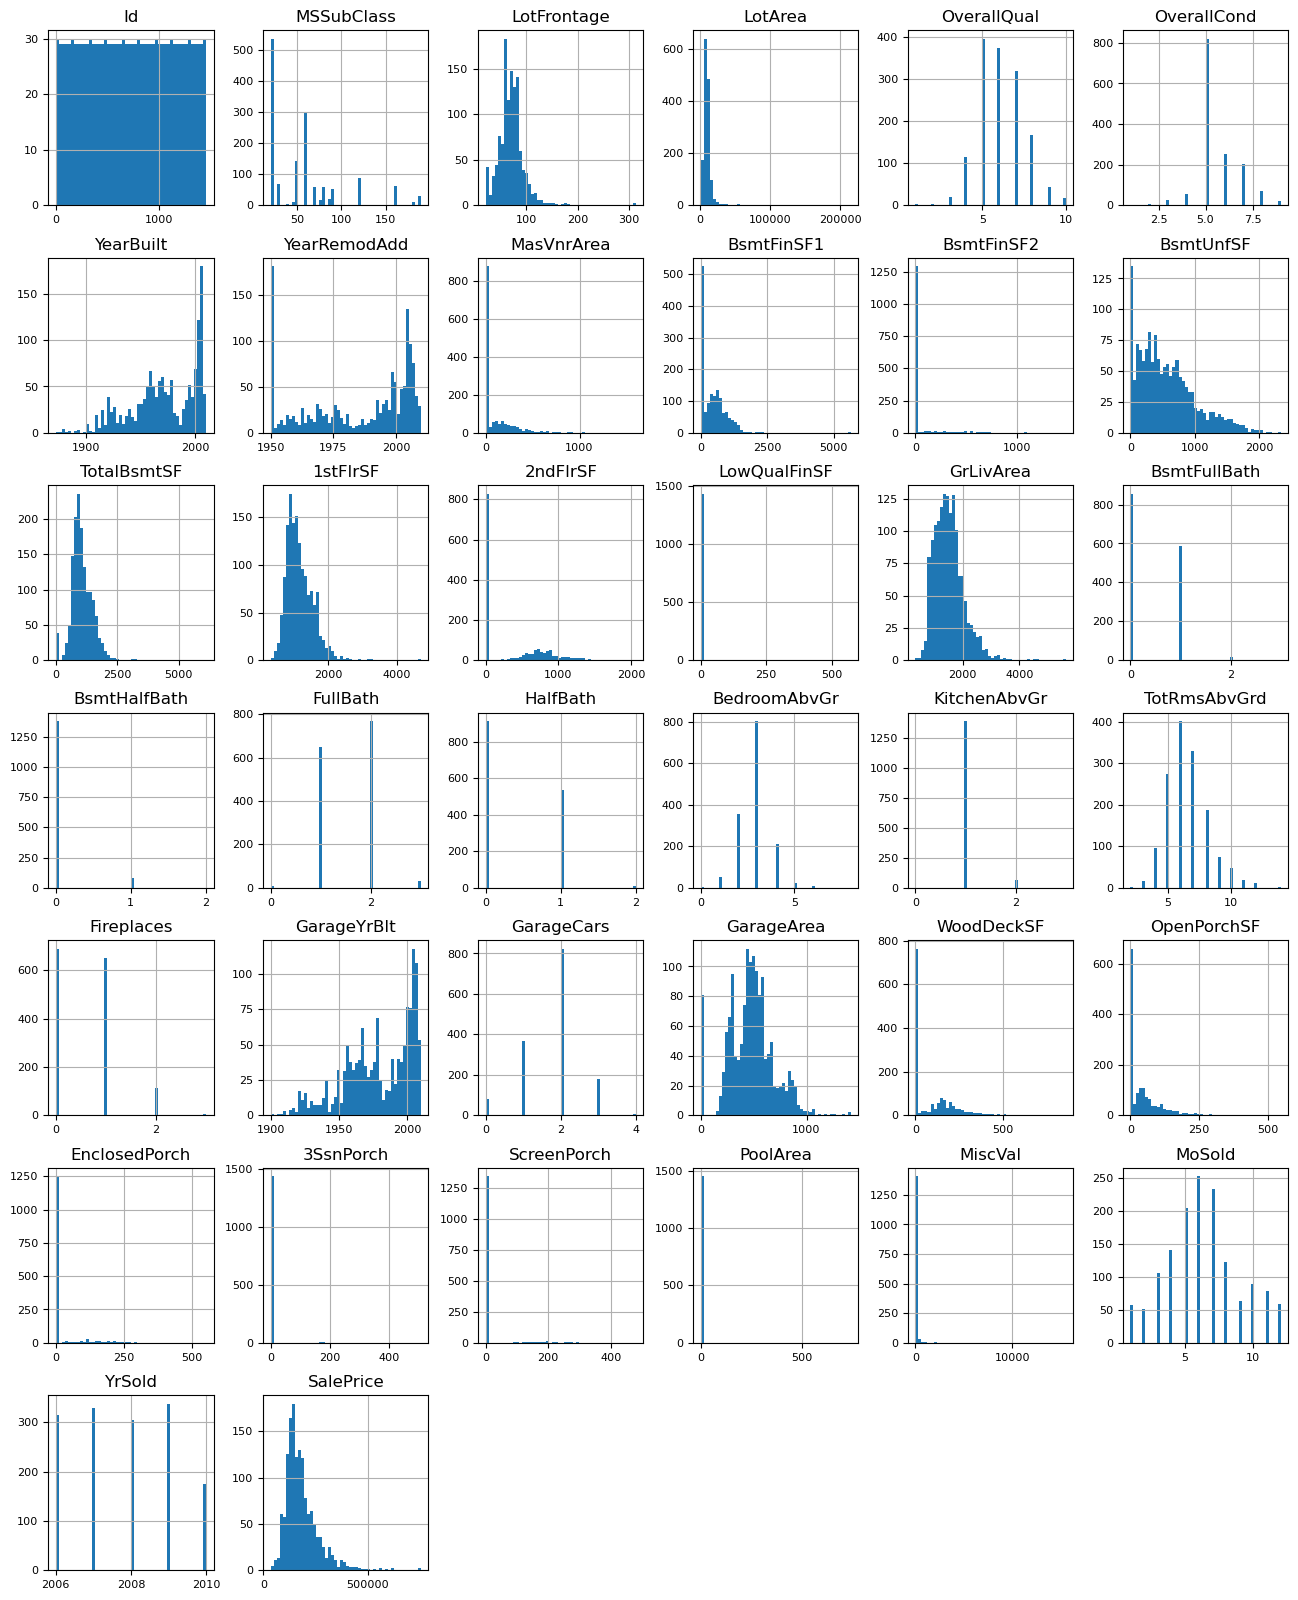

In [32]:
title = "01.13 potential numeric features - 1way (histogram)"
html_code = f"<h1 style='font-size:15px; color:Grey; text-align:left;'>{title}</h1>"
display(HTML(html_code))
print()

print(df_num.columns)
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [176]:
def feature_profiler(df,hc_thresh=50):
    profile = pd.DataFrame({
        'dtype': df.dtypes,
        'num_missing': df.isnull().sum(),
        'pct_missing': df.isnull().mean().round(3),
        'n_unique': df.nunique(),
       # 'max_value': df.max(),
        'sample_values': df.apply(lambda x: x.dropna().unique()[:3])
    })

    profile['high_cardinality'] = profile['n_unique'] > hc_thresh  # 50, or any threshold you choose
#    return profile 

    print('high cardinality:')
    print(list(profile[profile['high_cardinality'] ==True].index ))
    print()
          
    return profile.sort_values(by=['dtype'], ascending=False)[0:100]
#    return profile.sort_values(by='n_unique', ascending=False)


def feature_profile_descr(df,feature_list=None):
    """
    df: ideally a training dataframe (no leakage)
    feature_list: list of features to profile, subset of df (optional, use all features in df by default)
    """

    #Default to entire dataframe
    if feature_list==None:
        feature_list_1=list(df.columns)
    else:
        feature_list_1==feature_list

    print('Exhaustive list of data types')
    print(df[feature_list_1].dtypes.value_counts())
    print()

    print(feature_profiler(df[feature_list_1])) #profiles entire data
    print()
    
    bool_cols = df.select_dtypes(include='bool').columns.tolist()
    date_cols = df.select_dtypes(include='datetime').columns.tolist()
    numer_cols = df.select_dtypes(include=['number','float','int','int64','float64']).columns.tolist()
    obj_cols = df.select_dtypes(include=['object','string']).columns.tolist()
    known_cols=bool_cols+date_cols+obj_cols+date_cols+numer_cols
    other_cols=list([x for x in feature_list_1 if x not in known_cols])

    list_of_cols=[bool_cols,date_cols,numer_cols,obj_cols,other_cols]
    col_desc=['Boolean','Date','Numeric','String/Object','Other (unk)']

    print()
    print('Native Formats: ')
    for i,col in enumerate(list_of_cols):
        #print(list_of_cols[i])
        #print(col)
        print(f"{col_desc[i]}: {len(col)} columns")
        print(f"Columns: {col}")
        print()

    col_dict={
        'bool_cols':bool_cols,
        'date_cols':date_cols,
        'numer_cols':numer_cols,
        'obj_cols':obj_cols,
        'known_cols':known_cols,
        'other_cols':other_cols
    }
    return  col_dict



In [170]:
feature_profiler(train_df)

high cardinality:
['index', 'Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'TotSF', 'finished_basement_sqft_qty', 'finished_basement_lowq_sqft_qty', 'LowQualFinSF_above', 'SalePrice_log', 'TotFinSF_2', 'TotFinSF_2_log', 'TotFinSF_2_sqrt', 'TototherSF_2', 'TototherSF_2_log', 'TototherSF_2_sqrt', 'LotArea_sqrt', 'home_age']



,dtype,num_missing,pct_missing,n_unique,sample_values,high_cardinality
Electrical,object,1,0.001,5,"[SBrkr, FuseF, FuseA]",False
Exterior1st,object,0,0.000,15,"[VinylSd, MetalSd, Wd Sdng]",False
MasVnrType,object,872,0.597,3,"[BrkFace, Stone, BrkCmn]",False
ExterQual,object,0,0.000,4,"[Gd, TA, Ex]",False
ExterCond,object,0,0.000,5,"[TA, Gd, Fa]",False
...,...,...,...,...,...,...
1stFlrSF,int64,0,0.000,753,"[856, 1262, 920]",True
2ndFlrSF,int64,0,0.000,417,"[854, 0, 866]",True
LowQualFinSF,int64,0,0.000,24,"[0, 360, 513]",False
GrLivArea,int64,0,0.000,861,"[1710, 1262, 1786]",True


In [180]:
col_dict_1 = feature_profile_descr(train_df)

print()
print('numer_cols')
print(col_dict_1['numer_cols'])
#print(col_dict_1)
print()


Exhaustive list of data types
int64      45
object     44
float64    26
Name: count, dtype: int64

high cardinality:
['index', 'Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'TotSF', 'finished_basement_sqft_qty', 'finished_basement_lowq_sqft_qty', 'LowQualFinSF_above', 'SalePrice_log', 'TotFinSF_2', 'TotFinSF_2_log', 'TotFinSF_2_sqrt', 'TototherSF_2', 'TototherSF_2_log', 'TototherSF_2_sqrt', 'LotArea_sqrt', 'home_age']

               dtype  num_missing  pct_missing  n_unique  \
Electrical    object            1        0.001         5   
Exterior1st   object            0        0.000        15   
MasVnrType    object          872        0.597         3   
ExterQual     object            0        0.000         4   
ExterCond     object            0        0.000      

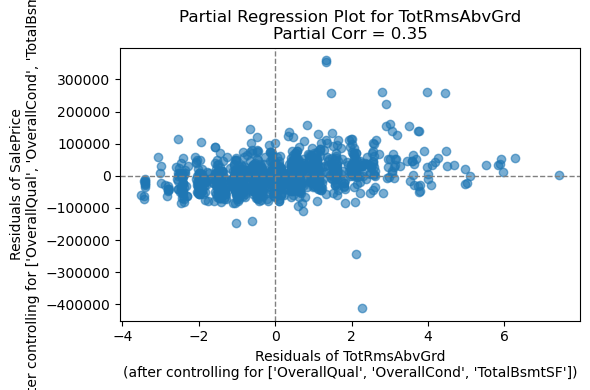

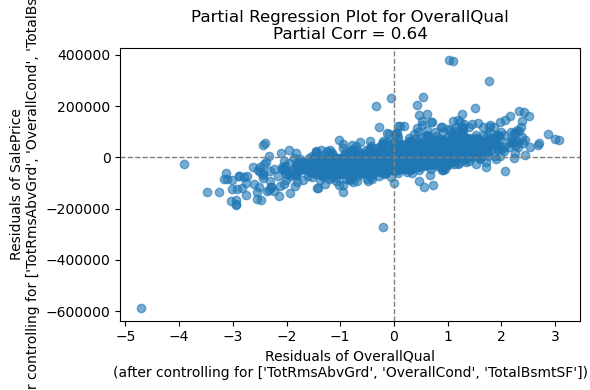

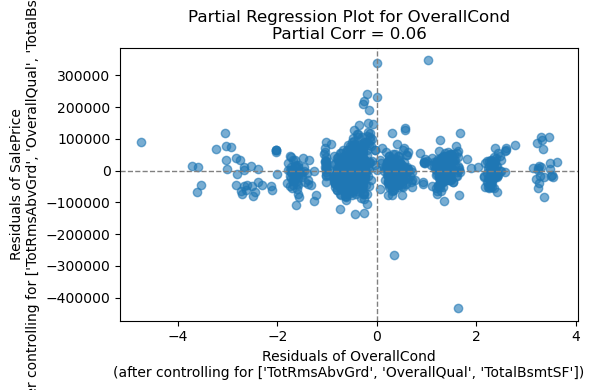

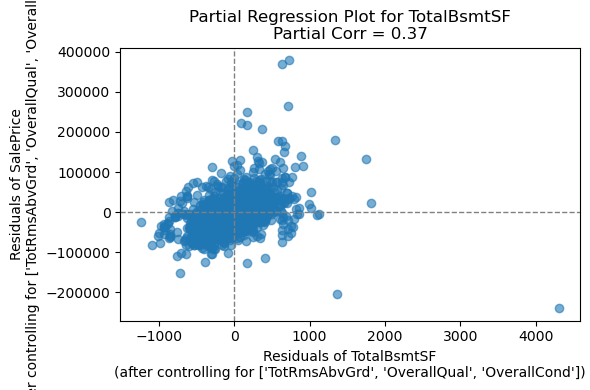

In [216]:
#scatterplots_vs_y(df_num, y_var='SalePrice')
partial_regression_plots(df_num,y_var='SalePrice',x_vars=['TotRmsAbvGrd', 'OverallQual','OverallCond','TotalBsmtSF'])

         #                                          'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       #'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       #'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       #'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       #'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       #'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       #'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       #'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],

In [184]:
title = "01.2 Custom EDA & Feature Engineering"
html_code = f"<h1 style='font-size:35px; color:Grey; text-align:left;'>{title}</h1>"
display(HTML(html_code))

#EDA
# quick feature EDA 
print(len(train_df))
#display(train_df[['Condition1','Condition2','TopFlrsSF']].groupby(by=['Condition1','Condition2']).count())
#display(train_df[['SaleCondition','SaleType','TopFlrsSF']].groupby(by=['SaleCondition','SaleType']).count())
#display(train_df[['MSZoning','Utilities','TopFlrsSF']].groupby(by=['MSZoning','Utilities']).count())
display(train_df[['MSZoning','Utilities','SalePrice']].groupby(by=['MSZoning','Utilities']).mean())
display(train_df[['LandContour','SalePrice']].groupby(by=['LandContour']).count()) # probably matters
display(train_df[['GarageCars','SalePrice']].groupby(by=['GarageCars']).count()) # probably matters

#display(train_df[['LandContour','SalePrice']].groupby(by=['LandContour']).mean())

#MSSubClass SaleCondition SaleType LandContour MSZoning Utilities



# feature engineering
def feature_eng_001(train_df):
    base_columns=train_df.columns
    print(f"Base columns: {base_columns}")
    
    train_df['Porch_All'] = np.where(train_df['ScreenPorch']+train_df['3SsnPorch']+train_df['EnclosedPorch']+train_df['WoodDeckSF']>0,1,0) 
    train_df['TotSF'] = train_df['2ndFlrSF']+train_df['1stFlrSF'] + train_df['TotalBsmtSF']  # TotalBsmtSF
    #train_df['TotSF'] = train_df['2ndFlrSF']+train_df['1stFlrSF'] + train_df['BsmtFinSF1']+train_df['BsmtFinSF2'] # TotalBsmtSF
    #train_df['TopFlrsSF'] = train_df['2ndFlrSF']+train_df['1stFlrSF']
    #unifinished
    train_df['Baths_All'] = train_df['FullBath']+train_df['HalfBath']
    train_df['Baths_All_2']=np.clip(train_df['Baths_All'],0,4)
    
    train_df['Density_MidHigh'] = np.where(train_df['MSZoning'].isin(['RH','RM']),1,0)
    train_df['unusual_setup'] = np.where( ( train_df['MSZoning'].isin(['C (all)']) ) |  ( train_df['Utilities'].isin(['NoSeWa']) ) |  ( train_df['SaleCondition'].isin(['Family']) )  ,1,0)
    #'GarageCars'
    #adjacent (park/freeway etc)
    
    train_df['finished_basement_in'] = np.where( (train_df['BsmtFinType1'].fillna('').isin(['GLQ','ALQ','Rec'])) | (train_df['BsmtFinType2'].fillna('').isin(['GLQ','ALQ','Rec'])),1,0)
    train_df['finished_basement_sqft_qty'] = np.where( train_df['BsmtFinType1'].isin(['GLQ','ALQ','Rec']),train_df['BsmtFinSF1'],0) +np.where( train_df['BsmtFinType2'].isin(['GLQ','ALQ','Rec']),train_df['BsmtFinSF2'],0)
    train_df['finished_basement_lowq_sqft_qty'] = np.where( train_df['BsmtFinType1'].isin(['LwQ']),train_df['BsmtFinSF1'],0) +np.where( train_df['BsmtFinType2'].isin(['LwQ']),train_df['BsmtFinSF2'],0)
    train_df['LowQualFinSF_above'] = train_df['LowQualFinSF']- train_df['finished_basement_lowq_sqft_qty']
    train_df['basement_issues_in'] = np.where( (train_df['finished_basement_in'].fillna('').isin(['Fa','Po'])),1,0)
    
    train_df['exter_qual_cond_val'] = np.where( (train_df['ExterQual'].fillna('').isin(['TA'])) & (train_df['ExterCond'].fillna('').isin(['TA'])),0,
                                             np.where( (train_df['ExterQual'].fillna('').isin(['Ex','Gd','TA'])) & (train_df['ExterCond'].fillna('').isin(['Ex','Gd','TA'])) ,1, -1 ))
    
    
    train_df['Adjacent_negative_in'] = np.where((train_df['Condition1'].isna()==False) & ((train_df['Condition1'].isin(['Norm','PosN','PosA']))==False),1,
                                               np.where(((train_df['Condition1'].isin(['Norm','PosN','PosA']))==False),1,0))
    train_df['Adjacent_positive_in'] = np.where((train_df['Condition1'].isin(['PosN','PosA'])),1,0) # note this could occur in Condition 2 also
    train_df['SalePrice_log'] = np.log(train_df['SalePrice'])
    
    train_df['Garage_in'] = np.clip(train_df['GarageCars'],0,1)
    train_df['GarageCars_2'] = np.clip(train_df['GarageCars'],0,3)
    
    train_df['TotSF'] = train_df['2ndFlrSF']+train_df['1stFlrSF']+ train_df['TotalBsmtSF']

    train_df['TotFinSF_2'] = train_df['2ndFlrSF']+train_df['1stFlrSF']+ train_df['finished_basement_sqft_qty']-train_df['LowQualFinSF_above']
    train_df['TotFinSF_2_log']=np.log(train_df['TotFinSF_2'])
    train_df['TotFinSF_2_sqrt']=train_df['TotFinSF_2']**0.5
    
    train_df['SalePrice_per_sqft'] = train_df['SalePrice'] / train_df['TotSF']
    train_df['SalePrice_per_logsqft'] = train_df['SalePrice'] / np.log(train_df['TotSF'])

    train_df['TototherSF_2'] =train_df['TotSF'] - train_df['TotFinSF_2']
    train_df['TototherSF_2_log']=np.log(np.clip(train_df['TototherSF_2'],0.0001,9999999))
    train_df['TototherSF_2_sqrt']=(train_df['TototherSF_2']**0.5).fillna(0)
    
    train_df['LotArea_sqrt']=train_df['LotArea']**0.5
    train_df['months_4_thru_10']=np.where( (train_df['MoSold']>3 )&(train_df['MoSold']<11),1,0) 
    
    train_df['fin_crisis']=np.where( ((train_df['MoSold']>8 )&(train_df['YrSold']>2006)) | (train_df['YrSold']>2007),1,0) 
    train_df['electrical_heating_val'] = np.where( (train_df['Electrical'].isin(['SBrkr']))&(train_df['HeatingQC'].isin(['Gd','Ex']))&(train_df['CentralAir'].isin(['Y'])),1,
                                                      np.where( ((train_df['Electrical'].isin(['SBrkr']))==False) | ((train_df['HeatingQC'].isin(['Gd','Ex','TA']))==False)  | (train_df['CentralAir'].isin(['N'])),-1,0))
    train_df['built_post_1970']=np.where( (train_df['YearBuilt']>=1970 ),1,0) 
    train_df['built_post_2000']=np.where( (train_df['YearBuilt']>=2000 ),1,0) 
    train_df['home_age']=train_df['YrSold']-train_df['YearBuilt']  
    train_df['home_age_cat_val']=np.where( (train_df['home_age']<=5),2,  np.where( (train_df['home_age']<=10),1,np.where( (train_df['home_age']>30),-1,0)))
    
    train_df['const']=1

    all_columns=train_df.columns
    tmp_upd_columns=[x for x in all_columns if x not in base_columns]

    print(f"Upd columns: {tmp_upd_columns}")

    return train_df

#train_df=feature_eng_001(train_df)
all_df=feature_eng_001(all_df)
train_df=all_df[all_df['df_type']=='train'].copy(deep=True)
#test_df
#train_df['TototherSF_2_sqrt'].describe()

#HeatingQC CentralAir Electrical
#df_train.head()

1460


SalePrice
MSZoning Utilities               
C (all)  AllPub      74528.000000
FV       AllPub     214014.061538
RH       AllPub     131558.375000
RL       AllPub     191051.520870
         NoSeWa     137500.000000
RM       AllPub     126316.830275

,SalePrice
LandContour,
Bnk,63
HLS,50
Low,36
Lvl,1311


,SalePrice
GarageCars,
0.0,81
1.0,369
2.0,824
3.0,181
4.0,5


Base columns: Index(['index', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour',
       ...
       'TototherSF_2_sqrt', 'LotArea_sqrt', 'months_4_thru_10', 'fin_crisis',
       'electrical_heating_val', 'built_post_1970', 'built_post_2000',
       'home_age', 'home_age_cat_val', 'const'],
      dtype='object', length=115)
Upd columns: ['SalePrice_per_sqft', 'SalePrice_per_logsqft']


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from xgboost import XGBRegressor

random_state_val=42
x_vars_1 = ['months_4_thru_10','fin_crisis','LotArea_sqrt','built_post_1970','home_age_cat_val','Porch_All','TotFinSF_2_sqrt','TototherSF_2_sqrt','Baths_All_2','OverallCond','OverallQual','Adjacent_negative_in','Adjacent_positive_in','unusual_setup','Density_MidHigh','electrical_heating_val']
y_var_1 = 'SalePrice_log' # 'SalePrice'

target_var='SalePrice'

#train test split defined via index vs. a direct dataframe split, allowing for more flexibility in downstream steps
train_idx, test_idx = train_test_split(
    train_df.index, 
    test_size=0.2, 
    random_state=random_state_val
)

X_train=train_df.loc[train_idx,x_vars_1]
X_test=train_df.loc[test_idx,x_vars_1]

y_train=train_df.loc[train_idx,y_var_1]
y_test=train_df.loc[test_idx,y_var_1]

#define train/test split based on index, vs. 
#y=train_df[target_var]
#X=train_df[x_vars_1]
#X_train, X_test, y_train, y_test=train_test_split(X,y)



In [103]:
title = "03. Model building"
html_code = f"<h1 style='font-size:35px; color:Grey; text-align:left;'>{title}</h1>"
display(HTML(html_code))

title = "03.1 First pass models (select features)"
html_code = f"<h1 style='font-size:24px; color:Grey; text-align:left;'>{title}</h1>"
display(HTML(html_code))

In [119]:
# first pass models

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

random_state_val=42

# Dictionary of models and their parameter grids
models = {
    'RandomForest': {
        'model': RandomForestRegressor(random_state=random_state_val),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=random_state_val, objective='reg:squarederror'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.05, 0.1]
        }
    },
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}  # no hyperparams
    },
    'Lasso': {
        'model': Lasso(max_iter=10000),
        'params': {
            'alpha': [0.01, 0.1, 1, 10]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10]
        }
    }
}


In [121]:
print('hi')
results = []

for name, config in models.items():
    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='neg_root_mean_squared_error', refit=True)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred_train = best_model.predict(X_train)
    y_pred = best_model.predict(X_test)
    r2_score_val = r2_score(y_test,y_pred)
    r2_score_val_train = r2_score(y_train,y_pred_train)
    rmse = (mean_squared_error(y_test, y_pred))**0.5
    mae = (mean_absolute_error(y_test, y_pred))

    #print(results)
    
    print(f"{name}:")
    print(grid.best_params_)
    
    results.append({
        'model': name,
        'best_params': grid.best_params_,
        'cv_score': round(-grid.best_score_,4),
        'r2_train': round(r2_score_val_train,3),
        'r2_test': round(r2_score_val,3),
        'test_rmse': round(rmse,3),
        'test_mae': round(mae,3)
    })

#print(results)
for i in results:
    print(i['model'])
    print(i)
    print()

#note, evidence of over-fitting

hi
RandomForest:
{'max_depth': 10, 'n_estimators': 200}
XGBoost:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
LinearRegression:
{}
Lasso:
{'alpha': 0.01}
Ridge:
{'alpha': 10}
RandomForest
{'model': 'RandomForest', 'best_params': {'max_depth': 10, 'n_estimators': 200}, 'cv_score': np.float64(0.1514), 'r2_train': 0.968, 'r2_test': 0.883, 'test_rmse': 0.148, 'test_mae': 0.107}

XGBoost
{'model': 'XGBoost', 'best_params': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}, 'cv_score': np.float64(0.1425), 'r2_train': 0.947, 'r2_test': 0.897, 'test_rmse': 0.138, 'test_mae': 0.099}

LinearRegression
{'model': 'LinearRegression', 'best_params': {}, 'cv_score': np.float64(0.1544), 'r2_train': 0.848, 'r2_test': 0.897, 'test_rmse': 0.138, 'test_mae': 0.099}

Lasso
{'model': 'Lasso', 'best_params': {'alpha': 0.01}, 'cv_score': np.float64(0.1593), 'r2_train': 0.834, 'r2_test': 0.879, 'test_rmse': 0.15, 'test_mae': 0.103}

Ridge
{'model': 'Ridge', 'best_params': {'alpha': 10}

In [228]:
# adjusted model hyper-parameter grid, to reduce over-fitting in Random Forest and XGBoost

title = "03.2 Second pass models (select features)"
html_code = f"<h1 style='font-size:24px; color:Grey; text-align:left;'>{title}</h1>"
display(HTML(html_code))

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

random_state_val=42

# Dictionary of models and their parameter grids
models2 = {
    #updated to address overfitting
    'RandomForest': { 
        'model': RandomForestRegressor(random_state=random_state_val),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [5, 10, 15],
            #'max_depth': [None, 10, 20] #prior
           # 'min_samples_leaf': [5, 10, 20], #added
            'min_samples_leaf': [8, 12, 20], #updated
            'max_features': ['sqrt', 'log2'] #added
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=random_state_val, objective='reg:squarederror'),
        'params': {
#            'n_estimators': [100, 200],
            'n_estimators': [200, 400,600],
            'max_depth': [2, 3],
#            'max_depth': [3, 6],
            'learning_rate': [0.01,.02,.04]
            #'learning_rate': [0.05, 0.1]
        }
    },
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}  # no hyperparams
    },
    'Lasso': {
        'model': Lasso(max_iter=10000),
        'params': {
            'alpha': [0.01, 0.1, 1, 10]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10]
        }
    }
}


In [139]:
#2nd pass

print('hi')
results = []
i=0

for name, config in models2.items():
    i+=1 
    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='neg_root_mean_squared_error', refit=True)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred_train = best_model.predict(X_train)
    y_pred = best_model.predict(X_test)
    r2_score_val = r2_score(y_test,y_pred)
    r2_score_val_train = r2_score(y_train,y_pred_train)
    rmse = (mean_squared_error(y_test, y_pred))**0.5
    mae = (mean_absolute_error(y_test, y_pred))

    #print(results)
    
    print(f"{name}:")
    print(grid.best_params_)
    
    results.append({
        'model': name,
        'best_params': grid.best_params_,
        'cv_score': round(-grid.best_score_,4),
        'r2_train': round(r2_score_val_train,3),
        'r2_test': round(r2_score_val,3),
        'test_rmse': round(rmse,3),
        'test_mae': round(mae,3)
    })

    #keep best model in a dictionary
    if i==1:
        model_dict = {name: best_model}
    else:
        model_dict[name]=best_model
        
#print(results)

#print(results)
for i in results:
    print(i['model'])
    print(i)
    print()

#improved , evidence of over-fitting

hi
RandomForest:
{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 200}
XGBoost:
{'learning_rate': 0.04, 'max_depth': 3, 'n_estimators': 400}
LinearRegression:
{}
Lasso:
{'alpha': 0.01}
Ridge:
{'alpha': 10}
RandomForest
{'model': 'RandomForest', 'best_params': {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 200}, 'cv_score': np.float64(0.16), 'r2_train': 0.874, 'r2_test': 0.845, 'test_rmse': 0.17, 'test_mae': 0.115}

XGBoost
{'model': 'XGBoost', 'best_params': {'learning_rate': 0.04, 'max_depth': 3, 'n_estimators': 400}, 'cv_score': np.float64(0.1421), 'r2_train': 0.941, 'r2_test': 0.895, 'test_rmse': 0.14, 'test_mae': 0.099}

LinearRegression
{'model': 'LinearRegression', 'best_params': {}, 'cv_score': np.float64(0.1544), 'r2_train': 0.848, 'r2_test': 0.897, 'test_rmse': 0.138, 'test_mae': 0.099}

Lasso
{'model': 'Lasso', 'best_params': {'alpha': 0.01}, 'cv_score': np.float64(0.1593), 'r2_train': 0.834, 'r2_test': 0.879, 

In [141]:
#model_dict

{'RandomForest': RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=8,
                       n_estimators=200, random_state=42),
 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 'LinearRegression': LinearRegression(),
 'Lasso': Lasso(alpha=0.01, max_iter=10000

In [250]:
#model_dict['RandomForest'].predict(X_train)

In [161]:
y_pred_XGB_2 = model_dict['XGBoost'].predict(X_train)

results_df_1=train_df.copy()
results_df_1.loc[train_idx, 'group_desc'] = 'train' #ID as train
results_df_1.loc[train_idx, 'y_pred_XGB_2'] = y_pred_XGB_2
results_df_1['y_pred_XGB_2_exp']= np.exp(results_df_1['y_pred_XGB_2'])

results_df_1['y_pred_XGB_2_exp_resid']= results_df_1['y_pred_XGB_2_exp'] - results_df_1['SalePrice']
results_df_1['y_pred_XGB_2_resid']= results_df_1['y_pred_XGB_2'] - results_df_1['SalePrice_log']

In [218]:
#results_df_1
#col_dict_1['numer_cols']

#num_cols_01=col_dict_1['numer_cols']

for var in ['TotRmsAbvGrd', 'OverallQual','OverallCond']:
    print(var)
    print(round(results_df_1[[var,'y_pred_XGB_2_exp_resid','y_pred_XGB_2_exp','SalePrice']].groupby(by=var).mean().reset_index()))
    
# possible underfitting

TotRmsAbvGrd
    TotRmsAbvGrd  y_pred_XGB_2_exp_resid  y_pred_XGB_2_exp  SalePrice
0              2                  4119.0           43419.0    39300.0
1              3                   679.0          111829.0   111218.0
2              4                 -2370.0          125031.0   122845.0
3              5                  -410.0          140375.0   141551.0
4              6                 -1609.0          161071.0   161303.0
5              7                 -1547.0          193735.0   196667.0
6              8                  -494.0          213899.0   213428.0
7              9                  1193.0          250708.0   252988.0
8             10                 -6851.0          275744.0   296279.0
9             11                  6703.0          294313.0   318022.0
10            12                -17400.0          286587.0   280971.0
11            14                 -6070.0          193930.0   200000.0
OverallQual
   OverallQual  y_pred_XGB_2_exp_resid  y_pred_XGB_2_exp  SalePri

In [208]:
#train_df['SalePrice']
#train_df['SalePrice_per_sqft']
#train_df['SalePrice_per_logsqft']

# neighborhood clustering

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Subset train_df using train_idx
train_subset = train_df.loc[train_idx]

neighborhood_stats=train_subset[['Neighborhood','SalePrice', 'SalePrice_per_sqft','SalePrice_per_logsqft']].groupby('Neighborhood').agg(['mean', 'median']).reset_index()
#neighborhood_stats=train_df[['Neighborhood','SalePrice', 'SalePrice_per_sqft','SalePrice_per_logsqft']].groupby('Neighborhood').mean().reset_index()

neighborhood_stats.columns = [
    f"{col[0]}_{col[1]}" if col[1] else col[0] for col in neighborhood_stats.columns.values
]

print(neighborhood_stats.columns)


# Use PCA to collapse the two variables into one principal component.
pca = PCA(n_components=1)
neighborhood_stats['pca_score'] = pca.fit_transform(neighborhood_stats[['SalePrice_mean', 'SalePrice_median',
       'SalePrice_per_sqft_mean', 'SalePrice_per_sqft_median',
       'SalePrice_per_logsqft_mean', 'SalePrice_per_logsqft_median']])

# Choose the number of clusters (bins) you want, for instance, 4.
k = 4  # this can be any integer between 3 and 6 based on your criteria
kmeans_pca = KMeans(n_clusters=k, random_state=42)
neighborhood_stats['cluster'] = kmeans_pca.fit_predict(neighborhood_stats[['pca_score']])

neighborhood_stats['cluster_mean_score']=neighborhood_stats['cluster'].map(
    neighborhood_stats.groupby(by='cluster')['pca_score'].mean()
)

print(neighborhood_stats)

# Create a mapping from neighborhood to its cluster/bin.
nbhd_mapping_pca = dict(zip(neighborhood_stats['Neighborhood'], neighborhood_stats['cluster']))
print(nbhd_mapping_pca)

nbhd_mapping_pca_val = dict(zip(neighborhood_stats['Neighborhood'], neighborhood_stats['cluster_mean_score']))
print(nbhd_mapping_pca_val)

all_df['nhd_cluster_bin'] = all_df['Neighborhood'].map(nbhd_mapping_pca)
train_df['nhd_cluster_bin'] = train_df['Neighborhood'].map(nbhd_mapping_pca)

all_df['nhd_cluster_bin_val'] = all_df['Neighborhood'].map(nbhd_mapping_pca_val)
train_df['nhd_cluster_bin_val'] = train_df['Neighborhood'].map(nbhd_mapping_pca_val)

#group_by_print_1(all_df,['nhd_cluster_bin','Neighborhood'],smry_vars)


Index(['Neighborhood', 'SalePrice_mean', 'SalePrice_median',
       'SalePrice_per_sqft_mean', 'SalePrice_per_sqft_median',
       'SalePrice_per_logsqft_mean', 'SalePrice_per_logsqft_median'],
      dtype='object')
   Neighborhood  SalePrice_mean  SalePrice_median  SalePrice_per_sqft_mean  \
0       Blmngtn   191468.400000          181000.0                69.518719   
1       Blueste   124000.000000          124000.0                69.273743   
2        BrDale   100915.384615          100000.0                59.726348   
3       BrkSide   122640.000000          120000.0                64.864298   
4       ClearCr   221842.105263          211000.0                73.296285   
5       CollgCr   201112.008696          200500.0                74.878257   
6       Crawfor   211587.204545          208550.0                74.699499   
7       Edwards   127908.850575          123500.0                61.937087   
8       Gilbert   196540.646154          184000.0                77.872361   
9   

In [242]:
#additional feature engineering (may or may not use)
train_df['finished_basement_in'] = np.where( (train_df['BsmtFinType1'].fillna('').isin(['GLQ','ALQ','Rec'])) | (train_df['BsmtFinType2'].fillna('').isin(['GLQ','ALQ','Rec'])),1,0)
train_df['finished_basement_sqft_qty'] = np.where( train_df['BsmtFinType1'].isin(['GLQ','ALQ','Rec']),train_df['BsmtFinSF1'],0) +np.where( train_df['BsmtFinType2'].isin(['GLQ','ALQ','Rec']),train_df['BsmtFinSF2'],0)
train_df['basement_issues_in'] = np.where( (train_df['finished_basement_in'].fillna('').isin(['Fa','Po'])),1,0)

train_df['exter_qual_cond_val'] = np.where( (train_df['ExterQual'].fillna('').isin(['TA'])) & (train_df['ExterCond'].fillna('').isin(['TA'])),0,
                                         np.where( (train_df['ExterQual'].fillna('').isin(['Ex','Gd','TA'])) & (train_df['ExterCond'].fillna('').isin(['Ex','Gd','TA'])) ,1, -1 ))

train_df['electrical_heating_val'] = np.where( (train_df['Electrical'].isin(['SBrkr']))&(train_df['HeatingQC'].isin(['Gd','Ex']))&(train_df['CentralAir'].isin(['Y'])),1,
                                                  np.where( ((train_df['Electrical'].isin(['SBrkr']))==False) | ((train_df['HeatingQC'].isin(['Gd','Ex','TA']))==False)  | (train_df['CentralAir'].isin(['N'])),-1,0))


#random_state_val=42
#x_vars_1 = ['months_4_thru_10','fin_crisis','LotArea_sqrt','built_post_1970','home_age_cat_val','Porch_All','TotFinSF_2_sqrt','TototherSF_2_sqrt','Baths_All_2','OverallCond','OverallQual','Adjacent_negative_in','Adjacent_positive_in','unusual_setup','Density_MidHigh','electrical_heating_val']
#y_var_1 = 'SalePrice_log' # 'SalePrice'

#target_var='SalePrice'

x_vars_2=x_vars_1
#x_vars_2=x_vars_2+['nhd_cluster_bin_val'] #add label-encoded variable based on neighborhoods
x_vars_2=x_vars_2+['nhd_cluster_bin_val','finished_basement_in','basement_issues_in','exter_qual_cond_val'] #add label-encoded variable based on neighborhoods

X_train_2=train_df.loc[train_idx,x_vars_2]
X_test_2=train_df.loc[test_idx,x_vars_2]

# condition vars?


#y_train=train_df.loc[train_idx,y_var_1]
#y_test=train_df.loc[test_idx,y_var_1]


In [252]:
title = "03.3 Third pass models (select additional features)"
html_code = f"<h1 style='font-size:24px; color:Grey; text-align:left;'>{title}</h1>"
display(HTML(html_code))


#3rd pass

print('hi')
results = []
i=0

for name, config in models2.items():
    i+=1 
    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='neg_root_mean_squared_error', refit=True)
    grid.fit(X_train_2, y_train)
#    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred_train = best_model.predict(X_train_2)
    y_pred = best_model.predict(X_test_2)
    r2_score_val = r2_score(y_test,y_pred)
    r2_score_val_train = r2_score(y_train,y_pred_train)
    rmse = (mean_squared_error(y_test, y_pred))**0.5
    mae = (mean_absolute_error(y_test, y_pred))

    #print(results)
    
    print(f"{name}:")
    print(grid.best_params_)
    
    results.append({
        'model': name,
        'best_params': grid.best_params_,
        'cv_score': round(-grid.best_score_,4),
        'r2_train': round(r2_score_val_train,3),
        'r2_test': round(r2_score_val,3),
        'test_rmse': round(rmse,3),
        'test_mae': round(mae,3)
    })

    #keep best model in a dictionary
    if i==1:
        model_dict = {name: best_model}
    else:
        model_dict[name]=best_model
        
#print(results)

#print(results)
for i in results:
    print(i['model'])
    print(i)
    print()



hi
RandomForest:
{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 100}
XGBoost:
{'learning_rate': 0.04, 'max_depth': 2, 'n_estimators': 600}
LinearRegression:
{}
Lasso:
{'alpha': 0.01}
Ridge:
{'alpha': 10}
RandomForest
{'model': 'RandomForest', 'best_params': {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 100}, 'cv_score': np.float64(0.1594), 'r2_train': 0.873, 'r2_test': 0.849, 'test_rmse': 0.168, 'test_mae': 0.112}

XGBoost
{'model': 'XGBoost', 'best_params': {'learning_rate': 0.04, 'max_depth': 2, 'n_estimators': 600}, 'cv_score': np.float64(0.1376), 'r2_train': 0.924, 'r2_test': 0.902, 'test_rmse': 0.135, 'test_mae': 0.097}

LinearRegression
{'model': 'LinearRegression', 'best_params': {}, 'cv_score': np.float64(0.1496), 'r2_train': 0.86, 'r2_test': 0.903, 'test_rmse': 0.134, 'test_mae': 0.095}

Lasso
{'model': 'Lasso', 'best_params': {'alpha': 0.01}, 'cv_score': np.float64(0.1538), 'r2_train': 0.846, 'r2_test': 0.88

In [ ]:
## more to come in next version?

# continued examination of feature gaps

In [258]:
title = "04.0 Summary"
html_code = f"<h1 style='font-size:35px; color:Grey; text-align:left;'>{title}</h1>"
display(HTML(html_code))

subtitle = "1. Linear Regression performed surprisingly well, as well as XGBoost/Random Forest "
html_code = f"<h1 style='font-size:24px; color:Grey; text-align:left;'>{subtitle}</h1>"
display(HTML(html_code))

subtitle = "2. Each class of models performed relatively well, generating 0.85-0.9 R^2 value"
html_code = f"<h1 style='font-size:24px; color:Grey; text-align:left;'>{subtitle}</h1>"
display(HTML(html_code))

subtitle = "3. Further model comparisons and residual analysis [accuracy gaps] to come in upcoming version of this notebook"
html_code = f"<h1 style='font-size:24px; color:Grey; text-align:left;'>{subtitle}</h1>"
display(HTML(html_code))